<a href="https://colab.research.google.com/github/Potdooshami/SVO_gapmap/blob/main/compare_oldnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Load rawdata
# @markdown Do not touch this!!
from google.colab import drive

import h5py
import numpy as np
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/svo/fromMatlab/svo.h5'  # Replace with your actual file path
fn = '/content/drive/MyDrive/svo/fromMatlab/bg.h5' # background related
fn_new = '/content/drive/MyDrive/svo/fromMatlab/newStat.h5' # background related
'''
with h5py.File(file_path, 'r') as f:
    for key in f.keys():
        data = f[key][:]  # Load the dataset
        rank = data.ndim  # Get the rank
        transpose_order = tuple(range(rank - 1, -1, -1))  # Create transpose order
        globals()[key] = np.transpose(data, transpose_order)  # Transpose and assign
'''
def loadh5(fn):
  with h5py.File(fn, 'r') as f:
    for key in f.keys():
        data = f[key][:]  # Load the dataset
        rank = data.ndim  # Get the rank
        transpose_order = tuple(range(rank - 1, -1, -1))  # Create transpose order
        globals()[key] = np.transpose(data, transpose_order)  # Transpose and assign
loadh5(file_path)
loadh5(fn)
loadh5(fn_new)
# Now you can

Mounted at /content/drive


In [2]:
stat.shape

(461, 461, 2, 3)

In [3]:
newStat.shape

(461, 461, 2, 4)

In [7]:
import numpy as np
plns =  np.zeros([461,461,2,2,2])# x,y,iH,iS,ioldnew
plns[:,:,:,:,0] = stat[:,:,:,0:2]
plns[:,:,:,:,1] = newStat[:,:,:,0:2]

0 212521
0 212521
0 212521
0 212521
102440 212521
147110 212521
102440 212521
147110 212521


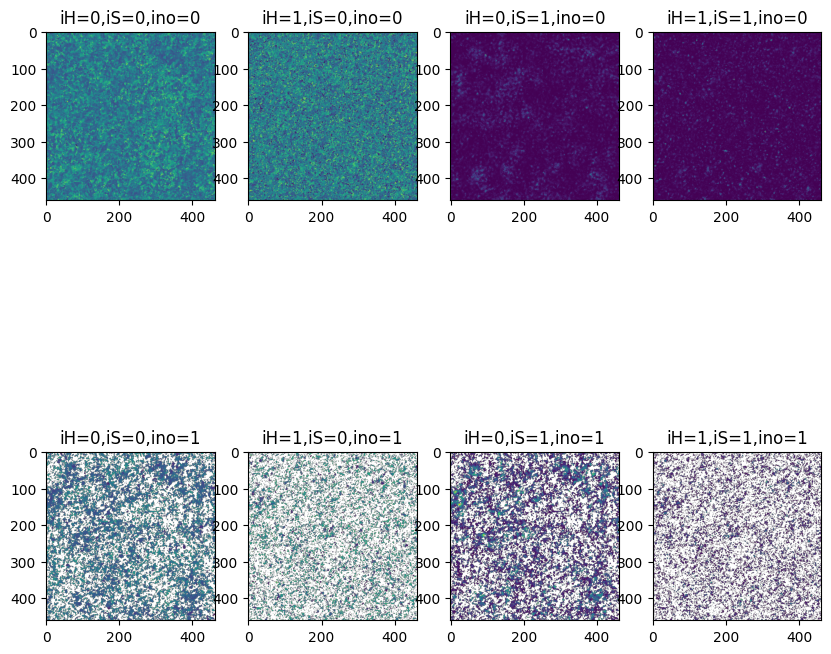

In [18]:
import matplotlib.pyplot as plt
msb,nsb = 2,4
fig,axs = plt.subplots(msb,nsb,figsize=(10,10))
iHs,iSs = [0,1,0,1],[0,0,1,1]
for isb,ino in  zip(range(msb),range(msb)):
  for jsb,iH,iS in zip(range(nsb),iHs,iSs) :
    pln = plns[:,:,iH,iS,ino]
    axs[isb,jsb].imshow(pln)
    axs[isb,jsb].set_title(f'iH={iH},iS={iS},ino={ino}')
    print(np.isnan(pln).sum(),pln.size)
#oops.... there is a nan




too many nan... but Dr.Lee said "Keep it up"